# GreyCampus DataScience Bootcamp Project


To Do - You are hired by a venture capitalist to predict the profit of a startup. Fo that you have to deal with a dataset which contains the details of 50 startup’s and predicts the profit of a new Startup based on certain features. Based on your decision and prediction, whether one should invest in a particular startup or not.

In [1]:
# importing libs
import numpy as np
import pandas as pd

In [2]:
#loading data
data=pd.read_csv('C:/Users/MUSKANG/Downloads/50_Startups.csv')

In [3]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
data.info()
#As there are no null value and the count is also 50 for all the columns so there is no missing value as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [5]:
#for selecting Feature 
features = data.iloc[:,:-1].values # independent variable
label = data.iloc[:,[-1]].values   #dependent variable

In [6]:
features

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [7]:
#convert the categorical features to numerical features as 
#sklearn works only with numpy array
#Instead of label enconding and then onehotencoding, 
#newer version directly works with onehotencoding using ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
features = transformer.fit_transform(features.tolist())
features

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [8]:
#converting an object to normal array
features = features.astype(float)

In [9]:
features

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

Splitting & Training the data

In [10]:
#sampling the dataset
#Her we took 10% for test set and remaining 90% for train set
#Training set will be used to train the model
#Create Training and Testing sets
# Testing set will be used to test our model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.1,
                                                random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 6)
(5, 6)
(45, 1)
(5, 1)


Applying models

In [11]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
for i in range(3,10):
    DTR = DecisionTreeRegressor(max_depth=3)
    DTR.fit(X_train,y_train)
    print("max_depth =  ",i)
    if i % 2 == 0:
        continue
    else:
        
        print("Training Score =",DTR.score(X_train,y_train))
        print("TEsting Score = ",DTR.score(X_test,y_test))
        
#training & testing scores for even max_depth is not printed as it is generally odd 

max_depth =   3
Training Score = 0.964135549361265
TEsting Score =  0.8826903406615043
max_depth =   4
max_depth =   5
Training Score = 0.9641355493612649
TEsting Score =  0.9539673413630927
max_depth =   6
max_depth =   7
Training Score = 0.964135549361265
TEsting Score =  0.9539673413630927
max_depth =   8
max_depth =   9
Training Score = 0.9641355493612649
TEsting Score =  0.8826903406615043


In [12]:
#since it is still not generalised lets take max_depth = 5
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=5)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [13]:
#checking score of training as well as testing
print(DTR.score(X_train,y_train))
print(DTR.score(X_test,y_test))

0.9985100386687856
0.9128375612161215


In [14]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
for i in range(3,10):
    RF=RandomForestRegressor(n_estimators=3)
    RF.fit(X_train,y_train.ravel())
    print("n_estimator = ",i)
    print("Training Score =",RF.score(X_train,y_train))
    print("TEsting Score = ",RF.score(X_test,y_test))

n_estimator =  3
Training Score = 0.979427570244144
TEsting Score =  0.9348614589898653
n_estimator =  4
Training Score = 0.9812176421453471
TEsting Score =  0.9847935358022829
n_estimator =  5
Training Score = 0.9570138083155659
TEsting Score =  0.959689322686798
n_estimator =  6
Training Score = 0.9532284331127546
TEsting Score =  0.9577642179211746
n_estimator =  7
Training Score = 0.981100122810381
TEsting Score =  0.9778558146050422
n_estimator =  8
Training Score = 0.9826537109685998
TEsting Score =  0.9517237232542822
n_estimator =  9
Training Score = 0.9655354273996349
TEsting Score =  0.9702214873977947


You can conclude that with n_estimator 5, generalized model canbe derived where testing score is more than training score.

In [22]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=7)
RF.fit(X_train,y_train.ravel())

print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.9802745282084518
0.9820860832969288


In [23]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_train_predict = lin_model.predict(X_train)
print ("Training score is: ",lin_model.score(X_train,y_train))
print ("Test score is: ", lin_model.score(X_test, y_test))

Training score is:  0.9504134746906459
Test score is:  0.9456487921716734


In [24]:
results = {'Decision Tree':[DTR.score(X_train,y_train), DTR.score(X_test,y_test)],
                            'Random Forest':[RF.score(X_train,y_train), RF.score(X_test,y_test)],
                            'Linear Regression':[lin_model.score(X_train,y_train), lin_model.score(X_test,y_test)]}
resultsdf = pd.DataFrame(data=results, index=["Training score", "Test score"])
testscores = resultsdf.T["Test score"]

In [25]:
winner = testscores.idxmax()
resultsdf.style.apply(lambda x: ['background: lightblue' if x.name == winner else '' for i in x])

,Decision Tree,Random Forest,Linear Regression
Training score,0.99851,0.980275,0.950413
Test score,0.912838,0.982086,0.945649


In the results we can easily see that Random Forest has been selected as the optimal method for this dataset.

# Prediction & Visualisation

In [26]:
#Predict based on the DecisionTreeRegressor model
dtr_pred = DTR.predict(X_test)
# Compare actual and predicted values
df_dtr = pd.DataFrame({'Real Profit Values':y_test.reshape(-1), 'Predicted Profit Values':dtr_pred.reshape(-1)})
df_dtr

,Real Profit Values,Predicted Profit Values
0,105008.31,108342.955
1,96479.51,97668.142
2,78239.91,81005.760
3,81229.06,70628.735
4,191050.39,166187.940


In [27]:
#Predict based on the RandonForestRegressor model
rf_pred = RF.predict(X_test)
# Compare actual and predicted values
df_rf = pd.DataFrame({'Real Profit Values':y_test.reshape(-1), 'Predicted Profit Values':rf_pred.reshape(-1)})
df_rf

,Real Profit Values,Predicted Profit Values
0,105008.31,110420.397143
1,96479.51,93540.482857
2,78239.91,80053.347143
3,81229.06,79374.592857
4,191050.39,180580.034286


In [28]:
#Predict based on linear regression model
lf_pred = lin_model.predict(X_test)
#Compare actual and predicted values
df_lf = pd.DataFrame({'Real Profit Values':y_test.reshape(-1), 'Predicted Profit Values':lf_pred.reshape(-1)})
df_lf

,Real Profit Values,Predicted Profit Values
0,105008.31,114003.974954
1,96479.51,88411.681111
2,78239.91,74630.776232
3,81229.06,66973.147775
4,191050.39,180762.833806


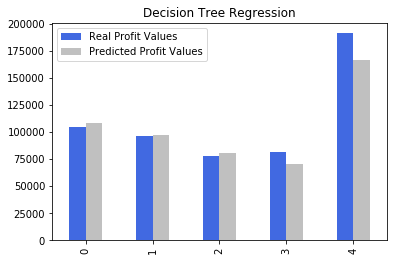

In [29]:
import matplotlib.pyplot as plt
df_dtr.plot.bar(title='Decision Tree Regression',color=['royalblue','silver'])
plt.show()

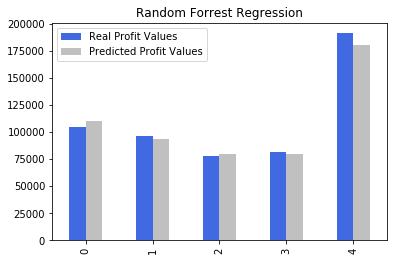

In [30]:
df_rf.plot.bar(title='Random Forrest Regression',color=['royalblue','silver'])
plt.show()

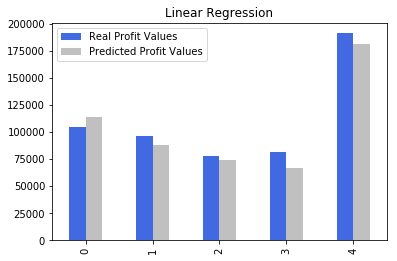

In [31]:
df_lf.plot.bar(title='Linear Regression',color=['royalblue','silver'])
plt.show()

In [ ]:
#thanks_for_your_time.